In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train = train.drop('Name', axis = 1)
train = train.drop('Cabin', axis = 1)
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [154]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [155]:
train.describe(include = ["O"])

,PassengerId,HomePlanet,CryoSleep,Destination,VIP
count,8693,8492,8476,8511,8490
unique,8693,3,2,3,2
top,0001_01,Earth,False,TRAPPIST-1e,False
freq,1,4602,5439,5915,8291


In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


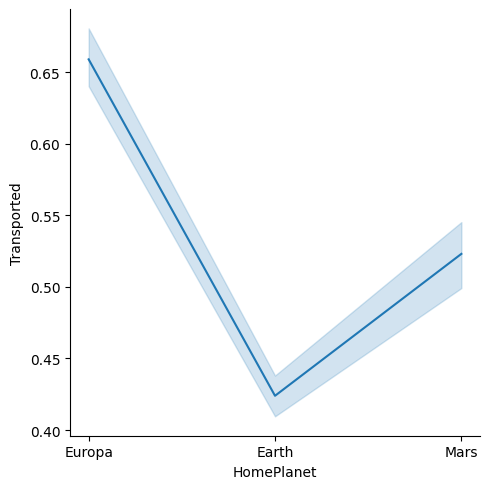

In [157]:
sns.relplot( 
    data = train, kind = "line",
    x = "HomePlanet", y = "Transported"
)

In [158]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

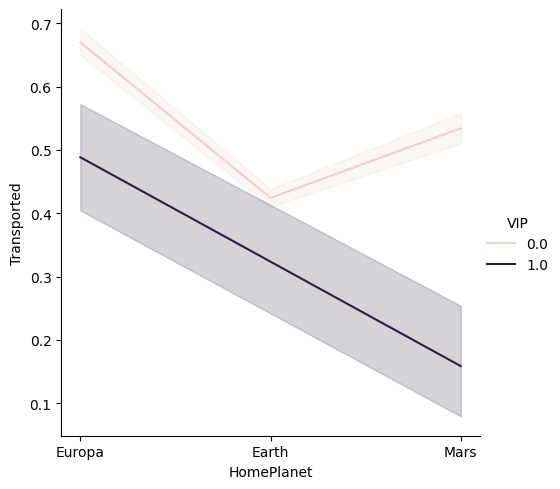

In [159]:
sns.relplot(
    data=train, kind='line',
    x='HomePlanet', y = 'Transported' ,hue = 'VIP'
)

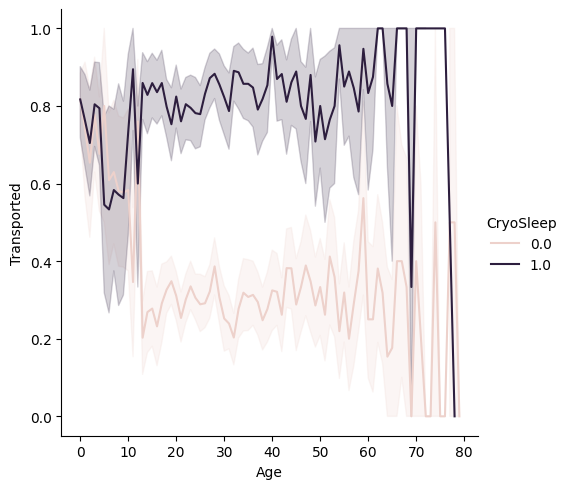

In [160]:
sns.relplot(
    data=train, kind='line',
    x='Age', y = 'Transported', hue = 'CryoSleep'
)

In [161]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [162]:
tab = pd.crosstab(train['HomePlanet'], train['Destination'])
print (tab)

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth                690            712         3101
Europa               886             19         1189
Mars                 193             49         1475


C:\Users\Ai-Khaan\AppData\Local\Temp\ipykernel_3728\2316824496.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


<AxesSubplot: >

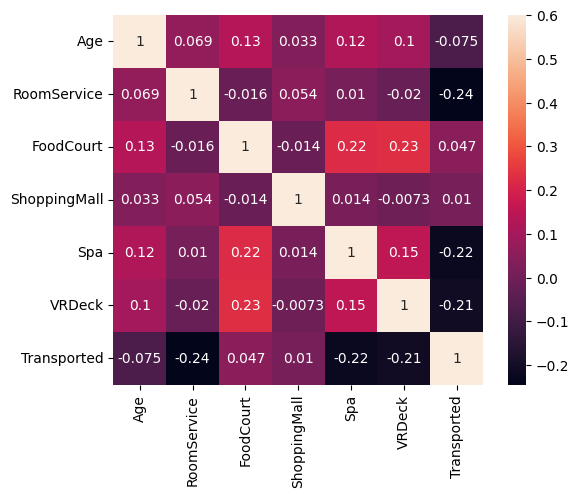

In [163]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, vmax=0.6, square = True, annot = True)

In [243]:
columns_train = ['VIP','Age','CryoSleep','Destination','HomePlanet','Spa','VRDeck','RoomService','FoodCourt','ShoppingMall']
columns_target = ['Transported']
X = train[columns_train]
Y = train[columns_target]
X.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

# заменяем символьные данные на численные, а также заполняем пустые строки

In [401]:
X["HomePlanet"] = X["HomePlanet"].replace('Earth',0)
X["HomePlanet"] = X["HomePlanet"].replace('Mars',1)
X["HomePlanet"] = X["HomePlanet"].replace('Europa',2)
X['HomePlanet'] = X['HomePlanet'].fillna(0)
X["Destination"] = X["Destination"].replace('TRAPPIST-1e',0)
X["Destination"] = X["Destination"].replace('55 Cancri e',1)
X["Destination"] = X["Destination"].replace('PSO J318.5-22',2)
X['Destination'] = X['Destination'].fillna(0)
X['CryoSleep'] = X['CryoSleep'].replace(False,0)
X['CryoSleep'] = X['CryoSleep'].replace(True,1)
X['CryoSleep'] = X['CryoSleep'].fillna(0)
X['VIP'] = X['VIP'].replace(False,0)
X['VIP'] = X['VIP'].replace(True,1)
X['VIP'] = X['VIP'].fillna(0)
#===
X['RoomService'] = X['RoomService'].fillna( 0)
X['FoodCourt'] = X['FoodCourt'].fillna(0)
X['ShoppingMall'] = X['ShoppingMall'].fillna(0)
X['Spa'] = X['Spa'].fillna(0)
X['VRDeck'] = X['VRDeck'].fillna(0)
X['Age'] = X['Age'].fillna(28)



C:\Users\Ai-Khaan\AppData\Local\Temp\ipykernel_3728\3317086872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["HomePlanet"] = X["HomePlanet"].replace('Earth',0)
C:\Users\Ai-Khaan\AppData\Local\Temp\ipykernel_3728\3317086872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["HomePlanet"] = X["HomePlanet"].replace('Mars',1)
C:\Users\Ai-Khaan\AppData\Local\Temp\ipykernel_3728\3317086872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [402]:
X

,VIP,Age,CryoSleep,Destination,HomePlanet,Spa,VRDeck,RoomService,FoodCourt,ShoppingMall
0,0.0,39.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24.0,0.0,0.0,0.0,549.0,44.0,109.0,9.0,25.0
2,1.0,58.0,0.0,0.0,2.0,6715.0,49.0,43.0,3576.0,0.0
3,0.0,33.0,0.0,0.0,2.0,3329.0,193.0,0.0,1283.0,371.0
4,0.0,16.0,0.0,0.0,0.0,565.0,2.0,303.0,70.0,151.0
...,...,...,...,...,...,...,...,...,...,...
8688,1.0,41.0,0.0,1.0,2.0,1643.0,74.0,0.0,6819.0,0.0
8689,0.0,18.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1872.0
8691,0.0,32.0,0.0,1.0,2.0,353.0,3235.0,0.0,1049.0,0.0


In [403]:
X.isnull().sum()

VIP             0
Age             0
CryoSleep       0
Destination     0
HomePlanet      0
Spa             0
VRDeck          0
RoomService     0
FoodCourt       0
ShoppingMall    0
dtype: int64

сделал тестовое ПредСКаЗаНиЕ и НаБиЛ 98(Глубина не важна)(Глубину не уважаю)

In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
parameters = {
    "criterion" : ["entropy","gini"],
    "max_depth":range(1,10),
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(1,10)
}
GridCV = GridSearchCV(clf, parameters,cv=5)
GridCV.fit(X, Y)
predmodel = GridCV.best_estimator_
predmodel.predict(X)
predmodel.score(X,Y)

0.8049004946508685

# теперь ПрЕдСкАзЫвАю с test.csv

In [389]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [390]:
test.VIP.value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [391]:
columns_test = ['VIP','Age','CryoSleep','Destination','HomePlanet','Spa','VRDeck','RoomService','FoodCourt','ShoppingMall']
X_test = test[columns_test]

In [392]:
X_test.isnull().sum()

VIP              93
Age              91
CryoSleep        93
Destination      92
HomePlanet       87
Spa             101
VRDeck           80
RoomService      82
FoodCourt       106
ShoppingMall     98
dtype: int64

In [393]:
X_test.Age.describe()

count    4186.000000
mean       28.658146
std        14.179072
min         0.000000
25%        19.000000
50%        26.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [394]:
X_test["HomePlanet"] = X_test["HomePlanet"].replace('Earth',0)
X_test["HomePlanet"] = X_test["HomePlanet"].replace('Mars',1)
X_test["HomePlanet"] = X_test["HomePlanet"].replace('Europa',2)
X_test['HomePlanet'] = X_test['HomePlanet'].fillna(0)
X_test["Destination"] = X_test["Destination"].replace('TRAPPIST-1e',0)
X_test["Destination"] = X_test["Destination"].replace('55 Cancri e',1)
X_test["Destination"] = X_test["Destination"].replace('PSO J318.5-22',2)
X_test['Destination'] = X_test['Destination'].fillna(0)
X_test['CryoSleep'] = X_test['CryoSleep'].replace(False,0)
X_test['CryoSleep'] = X_test['CryoSleep'].replace(True,1)
X_test['CryoSleep'] = X_test['CryoSleep'].fillna(0)
X_test['VIP'] = X_test['VIP'].replace(False,0)
X_test['VIP'] = X_test['VIP'].replace(True,1)
X_test['VIP'] = X_test['VIP'].fillna(0)
#===
X_test['RoomService'] = X_test['RoomService'].fillna(219.266269)
X_test['FoodCourt'] = X_test['FoodCourt'].fillna( 439.484296)
X_test['ShoppingMall'] = X_test['ShoppingMall'].fillna(177.295525)
X_test['Spa'] = X_test['Spa'].fillna(297.076689)
X_test['VRDeck'] = X_test['VRDeck'].fillna(305.571662)
X_test['Age'] = X_test['Age'].fillna(28.658146)


C:\Users\Ai-Khaan\AppData\Local\Temp\ipykernel_3728\2364723007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["HomePlanet"] = X_test["HomePlanet"].replace('Earth',0)
C:\Users\Ai-Khaan\AppData\Local\Temp\ipykernel_3728\2364723007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["HomePlanet"] = X_test["HomePlanet"].replace('Mars',1)
C:\Users\Ai-Khaan\AppData\Local\Temp\ipykernel_3728\2364723007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [395]:
X_test.isnull().sum()

VIP             0
Age             0
CryoSleep       0
Destination     0
HomePlanet      0
Spa             0
VRDeck          0
RoomService     0
FoodCourt       0
ShoppingMall    0
dtype: int64

In [398]:
submission = pd.DataFrame({
"PassengerId": test["PassengerId"],
"Transported":predmodel.predict(X_test)
})
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [399]:
submission.to_csv('submission(5).csv', index=False)